## **Предобработка данных. Категориальные признаки. Работа с текстами.**

Содержание семинара опирается на семинары, проводимые на ФКН. Во второй части работы отчасти использован туториал Kaggle по Word2Vec.

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

В первой части семинара будем использовать немного видоизменённый для наших целей датасет https://archive.ics.uci.edu/ml/datasets/AutoUniv.

В нём присутствуют целочисленные, вещественнозначные и категориальные признаки.

In [2]:
df = pd.read_csv('table.csv')
df.head()

,Unnamed: 0,att1,att2,att3,att4,att5,att6,att7,att8,att9,...,att117,att118,att119,att120,att121,att122,att123,att124,att125,class
0,0,6.4,550,92.0,3.15,78.2,6040,1.53,83.7,dog,...,0.77,4753,904,0.93,2.9,v1,27.6,294,739,class4
1,1,3.1,542,70.2,4.04,79.1,6464,1.56,94.7,seal,...,0.45,6952,905,0.91,5.2,v1,28.5,660,705,class4
2,2,3.2,579,90.9,4.16,76.7,6395,7.27,84.4,seal,...,0.45,4664,897,0.84,1.1,v1,27.7,546,688,class1
3,3,3.1,609,78.2,3.02,78.6,5678,8.04,88.2,bird,...,0.56,4762,873,0.48,1.3,v2,27.7,646,783,class4
4,4,2.7,557,81.0,4.03,78.9,6508,9.00,84.5,cat,...,0.48,4649,822,0.86,1.2,v1,47.0,642,665,class1


In [3]:
y = df['class']
X = df.drop(['class'], axis=1)
X.head()

,Unnamed: 0,att1,att2,att3,att4,att5,att6,att7,att8,att9,...,att116,att117,att118,att119,att120,att121,att122,att123,att124,att125
0,0,6.4,550,92.0,3.15,78.2,6040,1.53,83.7,dog,...,v3,0.77,4753,904,0.93,2.9,v1,27.6,294,739
1,1,3.1,542,70.2,4.04,79.1,6464,1.56,94.7,seal,...,v2,0.45,6952,905,0.91,5.2,v1,28.5,660,705
2,2,3.2,579,90.9,4.16,76.7,6395,7.27,84.4,seal,...,v1,0.45,4664,897,0.84,1.1,v1,27.7,546,688
3,3,3.1,609,78.2,3.02,78.6,5678,8.04,88.2,bird,...,v3,0.56,4762,873,0.48,1.3,v2,27.7,646,783
4,4,2.7,557,81.0,4.03,78.9,6508,9.00,84.5,cat,...,v3,0.48,4649,822,0.86,1.2,v1,47.0,642,665


In [4]:
label_enc = preprocessing.LabelEncoder()
y = label_enc.fit_transform(y)
y

array([3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 2, 0, 2, 0, 3, 0, 3,
       3, 3, 0, 3, 2, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0,
       3, 3, 2, 3, 0, 0, 0, 2, 0, 2, 0, 1, 0, 2, 3, 1, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 2, 2, 0, 0, 0, 1, 3, 0, 0, 0, 0,
       0, 3, 0, 0, 3, 3, 0, 2, 0, 0, 1, 0, 3, 0, 0, 2, 3, 0, 3, 0, 0, 3,
       0, 2, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0,
       3, 3, 3, 3, 0, 0, 2, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 2, 3, 0, 0, 0, 3, 3, 0,
       1, 0, 3, 3, 2, 3, 3, 0, 2, 3, 2, 2, 0, 3, 0, 1, 0, 0, 0, 3, 0, 0,
       2, 0, 2, 0, 0, 0, 2, 3, 0, 3, 0, 0, 3, 1, 0, 1, 3, 2, 0, 2, 0, 0,
       3, 0, 3, 0, 3, 2, 0, 0, 3, 3, 3, 3, 0, 1, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 3, 3, 0, 2, 3, 2, 3, 3, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 1,
       0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 3,
       0, 0, 0, 2, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0,

**Преобразование категориальных признаков**

Рассмотрим несколько типов предобработки данных. Она важна для корректной работы различных методов машинного обучения, в особенности, для линейных. 

Если в наших данных присутствуют категориальные признаки, то есть текстовые или порядковые признаки - те признаки, к которым нельзя относиться как к числам, то для дальнешей работы с такими данными надо преобразовать категориальные признаки в числа. 

Нельзя упускать из вида порядковые признаки. Например, если наши данные содержат в качестве столбца индекс местности, то алгоритм будет считать, что индекс 119331 > 119101, что для нас смысла не имеет. Мы хотим, чтобы различные индексы служили индикаторами различных географических областей. Для этого порядковые признаки также надо предобрабатывать и переводить в числовые.

Посмотрим, какие стоблцы нашей таблицы содержат категориальные признаки.

In [5]:
cat_features_mask = (X.dtypes == "object").values
cat_features_mask

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False,  True, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False])

In [6]:
len(cat_features_mask[cat_features_mask==True])

24

**1 способ кодирования: счётчики**

Мы можем посчитать, сколько раз каждое значение встречалось в таблице и заменить каждый категориальный признак соответствующим счетчиком.

In [7]:
X_copy = X.copy()

In [8]:
# your code here

,Unnamed: 0,att1,att2,att3,att4,att5,att6,att7,att8,att9,...,att116,att117,att118,att119,att120,att121,att122,att123,att124,att125
0,0,6.4,550,92.0,3.15,78.2,6040,1.53,83.7,78,...,187,0.77,4753,904,0.93,2.9,247,27.6,294,739
1,1,3.1,542,70.2,4.04,79.1,6464,1.56,94.7,80,...,149,0.45,6952,905,0.91,5.2,247,28.5,660,705
2,2,3.2,579,90.9,4.16,76.7,6395,7.27,84.4,80,...,164,0.45,4664,897,0.84,1.1,247,27.7,546,688
3,3,3.1,609,78.2,3.02,78.6,5678,8.04,88.2,79,...,187,0.56,4762,873,0.48,1.3,253,27.7,646,783
4,4,2.7,557,81.0,4.03,78.9,6508,9.00,84.5,72,...,187,0.48,4649,822,0.86,1.2,247,47.0,642,665


**2 способ кодирования: OneHot-кодирование**

Пусть некоторый признак принимает значения из множества K. OneHotEncoder вместо одного признака создает K бинарных признаков - по одному на каждое возможное значение исходного признака.

In [9]:
enc = preprocessing.OneHotEncoder(sparse=False, drop='first')
X_cat = enc.fit_transform(X_copy[X_copy.columns[cat_features_mask]])
X_cat = pd.DataFrame(data=X_cat)

In [10]:
print(X_cat.shape)
X_cat.head()

(500, 53)


,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


**3 способ кодирования: хэширование**

HashingVectorizer преобразовывает строку в числовой массив заданной длиной с помощью хэш-функции. В этом методе в качестве входных параметров мы задаем желаемое количество новых признаков, а также токенизатор - обработчик текста (в нём мы можем сделать любую удобную нам предобработку текста: удалить редкие слова, удалить знаки препинания, оставить только слова из определенного списка и т.д.). Токенизатор возвращает текст, разбитый на токены, т.е. на слова.

In [11]:
def my_tokenizer(s):
    return [elem for elem in s.split()]

Наиболее интересный для нас с точки зрения хэширования - столбец att9.

In [12]:
X_copy['att9'].drop_duplicates()

0         dog
1        seal
3        bird
4         cat
5        fish
14        pig
19    dolphin
Name: att9, dtype: object

Для применения HashingVectorize выбираем из столбца все различные значения(слова) без повторений, обучаем HashingVectorizer на этих словах и применяем ко всему столбцу. В итоге мы получаем разреженную матрицу. С ней умеют работать многие алгоритмы машинного обучения, но при желании можем перевести ее в numpy array.

In [13]:
from sklearn.feature_extraction.text import HashingVectorizer

coder = HashingVectorizer(tokenizer=my_tokenizer, n_features=3, norm='l2', alternate_sign=True)

train_wo_duple = X_copy['att9'].drop_duplicates()
coder.fit(train_wo_duple)

coder.transform(X_copy['att9'].values).toarray()

/Users/vladtitov/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


array([[-1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       ...,
       [ 0.,  0.,  1.],
       [-1.,  0.,  0.],
       [ 0.,  1.,  0.]])

**Заполнение пропусков**

В исходных данных могут быть пропущенные значения. Большинство методов машинного обучения не умеют с ними работать. Для этого мы должны каким-нибудь образом заполнить эти пропуски.

Способы заполнения пропусков:

* средним значением 
* медианой
* самым часто встречающимся значением
* каким-то одним новым значением (иногда пропуск в данных можно воспринимать как еще одно категориальное значение).
* можно взять часть данных для обучения, а на другой части данных предсказать пропущенные значения (тогда для решения основной задачи нельзя обучаться на первой части данных)

Посмотрим, есть ли пропуски в наших данных и много ли их.

In [14]:
#индексы строк с NAN

X_real = X_copy[X_copy.columns[~cat_features_mask]]

print(np.any(np.isnan(X_real)))

np.array(pd.isnull(X_real).any(1)).nonzero()[0]

True


array([  5,  14,  25,  26,  27,  66,  67,  69,  74,  83,  92,  99, 110,
       123, 124, 125, 343, 344, 345, 348, 352, 362])

Заполним пропуски в данных с помощью встроенного метода Imputer, используя среднее значение признака.

In [15]:
from sklearn.impute import SimpleImputer

mis_replacer = SimpleImputer(strategy="mean")
X_no_mis = pd.DataFrame(data=mis_replacer.fit_transform(X_real))

In [16]:
np.any(np.isnan(X_no_mis))

False

**Масштабирование признаков**

Для применения в особенности линейных методов машинного обучения масштабирование признаков очень важно. Может быть так, что метод даст совершенно неправильный результат без масштабирования.

Масштабирование признаков можно выполнить, например, одним из следующих способов:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (StandardScaler в sklearn)
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака (MinMaxScaler в sklearn)

In [17]:
normalizer = preprocessing.StandardScaler()
X_standard_scaled = normalizer.fit_transform(X_no_mis)
X_standard_scaled_pd = pd.DataFrame(data=X_standard_scaled)
X_standard_scaled_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,-1.728590,1.900803,-1.008627,1.673073,-0.882219,0.263659,-0.765146,-1.651706,-1.044694,0.332922,...,1.259626,-2.069681,1.088027,-1.003417,1.203292,1.221725,-0.379508,-1.199808,-2.073145,0.362206
1,-1.721662,-0.458755,-1.327007,-0.996571,0.592122,1.366884,-0.344978,-1.641333,1.354094,-1.004017,...,1.202224,-1.932185,-1.639284,0.760586,1.213074,1.131508,0.996822,-1.139352,0.609902,-0.001928
2,-1.714734,-0.387254,0.145500,1.538366,0.790909,-1.575049,-0.413355,0.332943,-0.892044,-1.029242,...,-0.118018,0.496910,-1.639284,-1.074811,1.134816,0.815747,-1.456636,-1.193091,-0.225801,-0.183995
3,-1.707806,-0.458755,1.339423,-0.016885,-1.097572,0.753981,-1.123875,0.599176,-0.063372,0.711301,...,-0.175420,-0.878049,-0.701771,-0.996197,0.900043,-0.808168,-1.336955,-1.193091,0.507272,0.833438
4,-1.700877,-0.744762,-0.730045,0.326005,0.575556,1.121723,-0.301376,0.931104,-0.870237,0.307697,...,1.144822,-0.786385,-1.383599,-1.086844,0.401149,0.905964,-1.396796,0.103367,0.477949,-0.430320


In [18]:
mm_scaler = preprocessing.MinMaxScaler()
X_mm_scaled = mm_scaler.fit_transform(X_no_mis)

Разберем пример данных, когда масштабирование признаков сильно влияет на результат работы алгоритмов машинного обучения. Рассмотрим точки, равномерно нанесенные на плоскость (в данном датасете в качестве признаков x и y выступают координаты - долгота и широта точек, все точки территориально находятся в Москве).

In [19]:
X = pd.read_csv('scaler_example.csv')
X.head()

,Unnamed: 0,lat,lon,class
0,0,55.718427,37.572628,1
1,1,55.718749,37.573061,1
2,2,55.719072,37.573495,1
3,3,55.719394,37.573928,1
4,4,55.719717,37.574361,1


Посмотрим, как выглядят точки из датасета. Точки относятся к двум классам.

Populating the interactive namespace from numpy and matplotlib


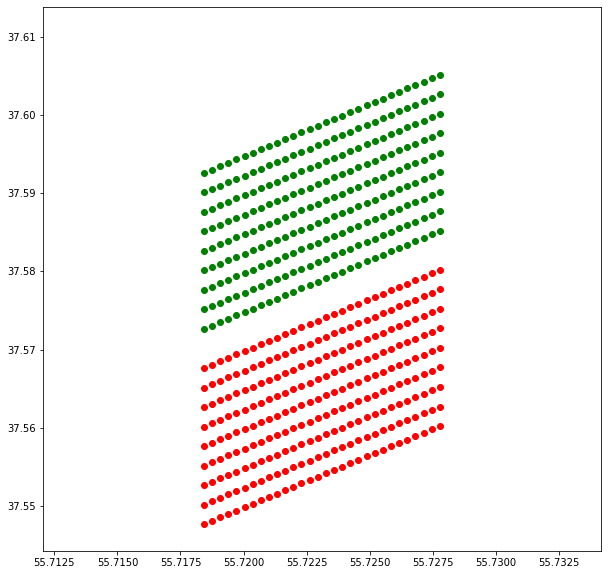

In [20]:
%pylab inline

Xtrain = X[['lat','lon']].values
Ytrain = X['class'].values

figure(figsize=(10,10))
scatter(Xtrain[Ytrain==1][:,0], Xtrain[Ytrain==1][:,1], color='green')
scatter(Xtrain[Ytrain==0][:,0], Xtrain[Ytrain==0][:,1], color='red')

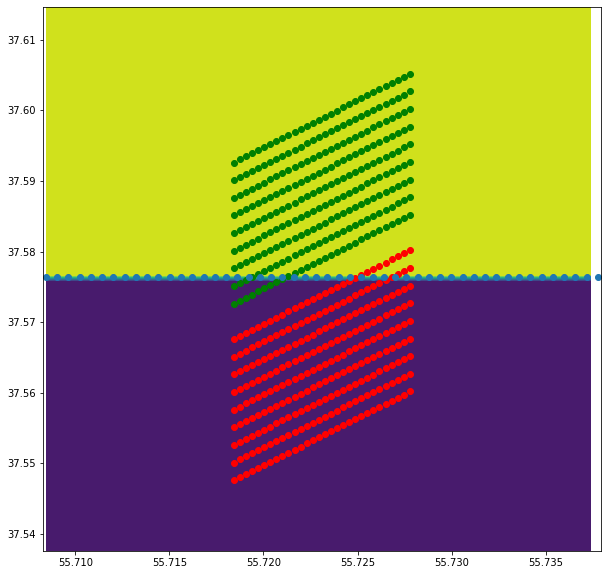

In [21]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(Xtrain, Ytrain)

def plot_decision_line(Xtrain, Ytrain, clf, h):

    x_min, x_max = Xtrain[:,0].min() - 0.01, Xtrain[:,0].max() + 0.01
    y_min, y_max = Xtrain[:,1].min() - 0.01, Xtrain[:,1].max() + 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.contourf(xx, yy, Z)

    Ytrain = np.array(Ytrain)
    plt.scatter(Xtrain[Ytrain==1][:,0], Xtrain[Ytrain==1][:,1], color='green')
    plt.scatter(Xtrain[Ytrain==0][:,0], Xtrain[Ytrain==0][:,1], color='red')

    a = clf.coef_[0][0]
    b = clf.coef_[0][1]
    c = clf.intercept_

    K = -a * 1. / b
    B = -c * 1. / b

    xx0 = np.linspace(x_min, x_max)
    yy0 = K * xx0 + B

    plt.scatter(xx0, yy0)
    plt.show()
    
plot_decision_line(Xtrain, Ytrain, clf, 0.001)

   Мы видим, что SVM абсолютно не справился с задачей. Попробуем теперь масштабировать данные.

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
TrainScaled = sc.fit_transform(Xtrain)

clf.fit(TrainScaled, Ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

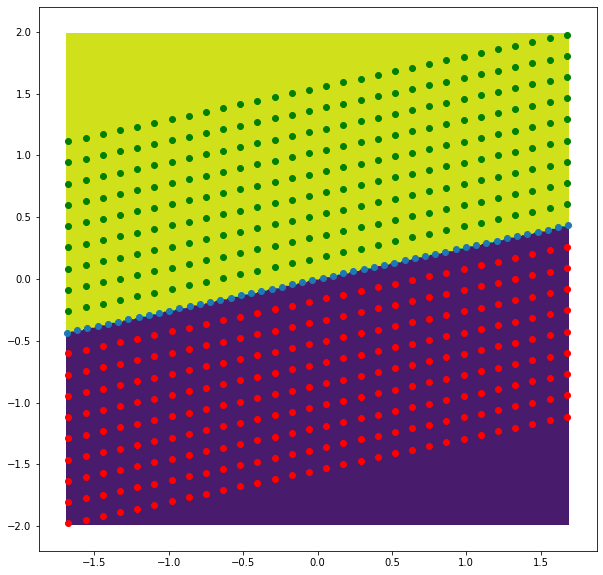

In [23]:
plot_decision_line(TrainScaled, Ytrain, clf, 0.01)

## **Работа с текстовыми признаками**

In [24]:
from tqdm import tqdm
import re

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/vladtitov/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Одним из направлений машинного обучения является работа с текстами и извлечение полезной информации из текстов. Чтобы алгоритмы машинного обучения могли работать с текстами, необходимо перевести тексты в наборы чисел. Для этого применяют различные алгоритмы векторизации текстов. 

Будем изучать датасет, содержащий отзывы о фильмах. Отзывы могут быть положительные, либо отрицательные. Наша конечная задача - научиться различать положительные и отрицательные отзывы.

Загрузим датасет и уберем из него плохие строки (в которых нет оценки фильму).

In [25]:
import codecs

with codecs.open('imdb_labelled.txt', encoding='utf-8') as thefile:
    print(thefile.read())

A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  	0
Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  	0
Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  	0
Very little music or anything to speak of.  	0
The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  	1
The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  	0
Wasted two hours.  	0
Saw the movie today and thought it was a good effort, good messages for kids.  	1
A bit predictable.  	0
Loved the casting of Jimmy Buffet as the science teacher.  	1
And those baby owls were adorable.  	1
The movie showed a lot of Florida at it's best, made it look very appealing.  	1
The Songs Were The Best And The M

In [26]:
responses = []
X = []
y = []

bad = 0
with codecs.open('imdb_labelled.txt', encoding='utf-8') as thefile:
    for row in tqdm(thefile.readlines()):
        # your code here

100%|██████████| 1002/1002 [00:00<00:00, 536194.51it/s]

The script is
Definitely worth seeing


2

In [27]:
bad_responses = list(filter(lambda review: 'awful' in review, X))
print(bad_responses[1])

And the rest of it just sits there being awful... with soldiers singing songs about the masculinity they pledge themselves to, hairsplitting about purity, the admiration of swords, etc.  


In [28]:
len(bad_responses)

12

In [29]:
len(X)

1000

Первые этапы обработки текста:

* приведение к нижнему регистру

* удаление пунктуации

* удаление всех символов, кроме символов нашего алфавита (в данном случае, латинского)

Удалить пунктуацию можно при помощи регулярных выражений. [Прикольный сайт для создания регулярок](https://regex101.com/).

In [30]:
print(re.sub(r'[^\w\s]', '', bad_responses[1].lower()).strip())

and the rest of it just sits there being awful with soldiers singing songs about the masculinity they pledge themselves to hairsplitting about purity the admiration of swords etc


In [31]:
Texts = [re.sub(r'[^\w\s]', '', elem.lower()).strip() for elem in X]
Texts[35]

'as they say in canada this is the fun game aye'

Посмотрим на распределение ответов в наших данных. 

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 500.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

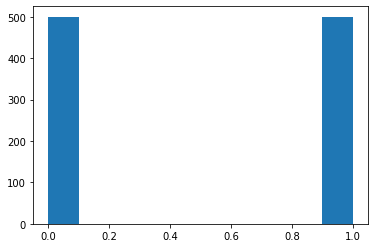

In [32]:
hist(y)

**1 способ векторизации: счётчик (CountVectorizer)**

Каждому слову соответствует количество его вхождений в текст.

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
vectorizer = CountVectorizer(encoding='utf8', min_df=5)
vectorizer.fit(Texts)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [35]:
vectorizer.transform(Texts[:1])

<1x384 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [36]:
print(vectorizer.transform(Texts[:1]).indptr)
print(vectorizer.transform(Texts[:1]).indices)
print(vectorizer.transform(Texts[:1]).data)

[0 4]
[  1 202 213 345]
[1 1 1 3]


**2 способ векторизации: TF-IDF**

Ещё один способ работы с текстовыми данными — TF-IDF (Term Frequency–Inverse Document Frequency). Рассмотрим коллекцию текстов $D$. Для каждого уникального слова $t$ из документа $d \in D$ вычислим следующие величины:

1. Term Frequency – количество вхождений слова в отношении к общему числу слов в тексте: 
    $$\text{tf}(t, d) = \frac{n_{td}}{\sum_{t \in d} n_{td}},$$ где $n_{td}$ — количество вхождений слова $t$ в текст $d$.
2. Inverse Document Frequency $$\text{idf}(t, D) = \log \frac{\left| D \right|}{\left| \{d\in D: t \in d\} \right|},$$ где $\left| \{d\in D: t \in d\} \right|$ – количество текстов в коллекции, содержащих слово $t$.

Тогда для каждой пары (слово, текст) $(t, d)$ вычислим величину: $$\text{tf-idf}(t,d, D) = \text{tf}(t, d)\cdot \text{idf}(t, D).$$

Отметим, что значение $\text{tf}(t, d)$ корректируется для часто встречающихся общеупотребимых слов при помощи значения $\text{idf}(t, D).$

Признаковым описанием одного объекта $d \in D$ будет вектор $\bigg(\text{tf-idf}(t,d, D)\bigg)_{t\in V}$, где $V$ – словарь всех слов, встречающихся в коллекции $D$.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
vectorizer = TfidfVectorizer(encoding='utf8', min_df=5)
_ = vectorizer.fit(Texts)

In [39]:
vectorizer.transform(Texts[:1])

<1x384 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [40]:
print(vectorizer.transform(Texts[:1]).indptr)
print(vectorizer.transform(Texts[:1]).indices)
print(vectorizer.transform(Texts[:1]).data)

[0 4]
[345 213 202   1]
[0.84496237 0.20428919 0.3928529  0.29995186]


Применим два рассмотренных метода векторизации к задаче классификации отзывов на два класса (положительные и отрицательные).

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

In [42]:
vectorizer = CountVectorizer(encoding='utf8', min_df=5)
vectorizer.fit(Texts)

X = vectorizer.transform(Texts)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict_proba(X_test)[:,1]
print('ROC-AUC: %.3f, ACC: %.3f' % (roc_auc_score(y_test, preds), accuracy_score(y_test, (preds > 0.5).astype(int))))

ROC-AUC: 0.788, ACC: 0.730


In [43]:
vectorizer = TfidfVectorizer(encoding='utf8', min_df=5)
vectorizer.fit(Texts)

X = vectorizer.transform(Texts)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict_proba(X_test)[:,1]
print('ROC-AUC: %.3f, ACC: %.3f' % (roc_auc_score(y_test, preds), accuracy_score(y_test, (preds > 0.5).astype(int))))

ROC-AUC: 0.780, ACC: 0.725


**Важность признаков**

В задачах, связанных с обработкой текстов, признаки как правило хорошо интерпретируемы. Для визуального контроля качества работы алгоритма можно посмотреть на те слова, которые алгоритм посчитал наиболее важными для данной задачи.

In [44]:
weights = zip(vectorizer.get_feature_names(), lr.coef_[0])
weights = sorted(weights, key=lambda i: i[1])
for i in range(1,20):
    print('%s, %.2f' % weights[-i])
    
print('...')
for i in reversed(range(1,20)):
    print('%s, %.2f' % weights[i])

great, 1.90
and, 1.81
wonderful, 1.69
love, 1.68
good, 1.45
excellent, 1.38
beautiful, 1.35
liked, 1.29
best, 1.29
actually, 1.14
funny, 1.13
right, 1.11
film, 1.11
enjoyed, 1.08
loved, 1.07
game, 1.03
nice, 0.93
give, 0.92
performance, 0.91
...
avoid, -0.89
cheap, -0.90
make, -0.90
sucked, -0.91
not, -0.94
just, -0.95
would, -0.99
nothing, -1.00
poor, -1.02
waste, -1.03
worst, -1.07
only, -1.09
script, -1.15
even, -1.20
didnt, -1.21
stupid, -1.38
awful, -1.40
terrible, -1.49
plot, -1.55


**3 способ векторизации: Word2Vec**

Word2Vec - это алгоритм, который собирает статистику по совместному появлению слов в фразах, а затем с помощью нейронных сетей решает задачу снижения размерности и выдает на выходе компактные векторные представления слов, в максимальной степени отражающие отношения этих слов в обрабатываемых текстах.

Нахождение связей между контекстами слов основано на предположении, что слова, находящиеся в похожих контекстах, имеют тенденцию значить похожие вещи, т.е. быть семантически близкими.

Применим векторизацию с помощью word2vec для наших данных. Кроме того, удалим stop-слова, то есть слова, часто встречающиеся во всех английских текстах - это ещё один полезный метод обработки текстов.

In [82]:
!pip install nltk

You should consider upgrading via the '/Users/vladtitov/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [60]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [46]:
from nltk.corpus import stopwords

stops = set(stopwords.words("english"))

In [47]:
def delete_stopwords(review, remove_stopwords=True):
    
    words = review.split()

    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    return(words)

Переведем строки нашего датасета в токенизированный вид и удалим из них стоп-слова - в этом виде они пригодны для использования word2vec.

In [48]:
import nltk.data
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def review_to_sentences(review,tokenizer,remove_stopwords=True ):

    raw_sentences = tokenizer.tokenize(review.strip())

    sentences = []
    for sentence in raw_sentences:
        if len(sentence) > 0:
            sentences.append(delete_stopwords(sentence,remove_stopwords))
    return sentences

sentences = []
Y = []
for i in range(len(Texts)):
    if len(set(Texts[i])) == 1:
        continue
    Y.append(y[i])
    sentences += review_to_sentences(Texts[i], tokenizer)

Применим word2vec к токенизированному корпусу.

In [49]:
num_features = 512         
min_word_count = 3           
num_workers = 4       
context = 5                                                                          
downsampling = 1e-5   

from gensim.models import word2vec


model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling, seed=42)

model.init_sims(replace=True)

model_name = str(num_features) + "features_word2vec"
model.save(model_name)

Теперь каждое слово корпуса имеет векторное представление

In [50]:
model.wv['good']

array([ 1.14962552e-02,  5.80080561e-02, -1.10338945e-02, -2.18423456e-02,
       -1.49925156e-02,  2.00584531e-02,  2.15249788e-02,  2.31121071e-02,
       -4.20966297e-02,  2.73882672e-02,  2.36231554e-02,  6.15935549e-02,
        6.55860975e-02, -3.47342193e-02,  6.85854182e-02,  5.87633215e-02,
        6.63423017e-02, -2.94217486e-02,  2.90437136e-03,  4.86286618e-02,
        6.96300268e-02, -5.14558367e-02,  1.34737734e-02, -5.36986068e-02,
       -2.94283275e-02, -4.90724407e-02,  4.54521086e-03, -6.86814561e-02,
        5.73521629e-02,  1.36821102e-02,  5.20717120e-03,  9.79577191e-03,
       -3.04576587e-02, -6.37344047e-02, -2.45175194e-02,  3.62244956e-02,
        1.09779555e-02, -4.27818634e-02,  1.65315978e-02,  1.20321596e-02,
       -7.86055326e-02, -4.24089618e-02,  4.82038558e-02,  4.84001115e-02,
       -4.69015725e-02,  2.08756179e-02, -1.01443557e-02, -6.68013766e-02,
        7.24420771e-02,  6.33128062e-02,  4.40622419e-02, -6.70885593e-02,
       -3.31807621e-02, -

В качестве одного из способов векторизовать текст (в нашем случае отзыв на фильм), можно усреднить векторы слов, входящих в этот текст. Так и сделаем.

In [51]:
index2word_set = set(model.wv.index2word)

def normalize(x):
    return x / np.sqrt(np.dot(x, x))

def make_featurevec(words, model, num_features):
    featureVec = np.zeros((num_features,), dtype="float32")
    nwords = 0.
    for word in words:
        if word in index2word_set:
            nwords = nwords + 1.
            featureVec += model[word]
    if nwords > 0:
        featureVec = normalize(featureVec)
        # featureVec = np.divide(featureVec, nwords)
    return featureVec

def get_avg_featurevecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        reviewFeatureVecs[counter] = make_featurevec(review, model, num_features)
        counter += 1
    return reviewFeatureVecs

trainDataVecs = get_avg_featurevecs(sentences, model, num_features)

/Users/vladtitov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


Наконец, обучим классификатор на полученных признаках.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(trainDataVecs, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict_proba(X_test)[:,1]
print('ROC-AUC: %.3f, ACC: %.3f' % (roc_auc_score(y_test, preds), accuracy_score(y_test, (preds > 0.5).astype(int))))

ROC-AUC: 0.741, ACC: 0.635
